From https://github.com/cgre-aachen/gempy/issues/617

In [1]:

import theano  # type: ignore

theano.config.gcc.cxxflags = "-Wno-c++11-narrowing"

import sys
path_gem = '../../gempy/'
sys.path.insert(0,path_gem)
import gempy as gp
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Not subsurface compatibility available


In [2]:

geo_model=gp.create_model('model')
geo_model = gp.init_data(geo_model, extent=[0,100,0,30,0,100], resolution=[100,100,100])



Active grids: ['regular']


In [3]:
geo_model.set_default_surfaces()
geo_model.add_surface_points(X=10, Y=15, Z=70, surface='surface1')
geo_model.add_surface_points(X=20, Y=15, Z=70, surface='surface1')
geo_model.add_surface_points(X=80, Y=15, Z=45, surface='surface1')
geo_model.add_surface_points(X=90, Y=15, Z=45, surface='surface1')


C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\core\data_modules\geometric_data.py:1368: RuntimeWarning: divide by zero encountered in true_divide
  new_grid_extent = (grid_extent - np.repeat(centers, 2)) / rescaling_factor + 0.5001
C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\core\data_modules\geometric_data.py:1369: RuntimeWarning: divide by zero encountered in true_divide
  new_grid_values = (grid_values - centers) / rescaling_factor + 0.5001
C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\core\interpolator.py:152: RuntimeWarning: invalid value encountered in double_scalars
  range_res = range_val / self.additional_data.rescaling_data.df.loc[
C:\Users\Simon\Documents\git\gempy-tests\notebooks\../../gempy\gempy\core\interpolator.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov_res = cov_val / self.additional_data.rescaling_data.df.loc[


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
geo_model.add_orientations(X=10, Y=15, Z=70, surface='surface1', orientation=np.array([0,0,1]))
geo_model.add_features('Fault1')
geo_model.add_surfaces('fault')
geo_model.add_surface_points(X=63.36, Y=15, Z=80.43, surface='fault')
geo_model.add_surface_points(X=40, Y=15, Z=40, surface='fault')
geo_model.add_orientations(55, Y=15, Z=50, surface='fault', orientation=np.array([270,64.5,1]))
gp.map_stack_to_surfaces(geo_model, {'Fault1':'fault', 'Layers':('surface1','surface2')})
geo_model.set_is_fault('Fault1')
gp.set_interpolator(geo_model, output=['geology'], theano_optimizer='fast_compile')
sol=gp.compute_model(geo_model)
print (np.unique(sol.fault_block))
print (sol.fault_block.shape)
print (sol.grid.values.shape)

In [20]:
sol.fault_block??

/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


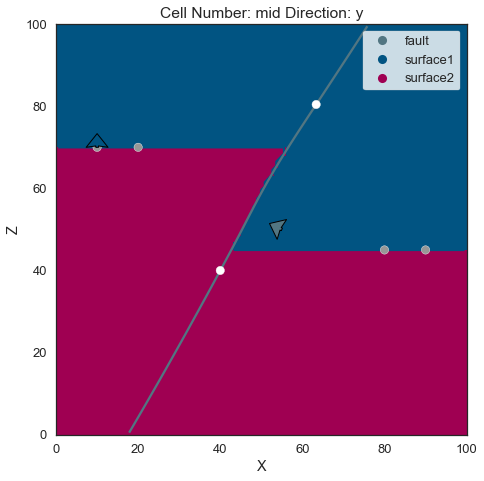

In [13]:
gp.plot_2d(geo_model)

/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


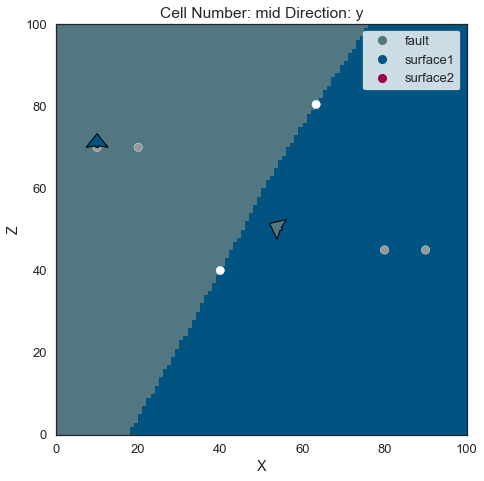

In [19]:
gp.plot_2d(geo_model, show_block=True, block=sol.block_matrix[0], show_boundaries=False)